## Lesson 2: Ordering the Sky
#### Learning Objectives:
After completing this lesson, users will be able to:
1. Describe array and table data types and their uses
2. Utilize python packages to open array and table data as represented by the data providers
3. Index and manipulate data within arrays and tables

_Python libraries introduced in this lesson:_ [`astropy.io.fits`](https://docs.astropy.org/en/stable/io/fits/index.html), [`matplotlib`](https://matplotlib.org/stable/), [`numpy`](https://numpy.org/doc/stable/), [`pandas`](https://pandas.pydata.org/docs/)

In [1]:
# Python Standard Library imports
from pathlib import Path

# third-party imports
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Introduction
In our last lesson, we aquired data from online NASA repositories to begin an investigation to identify which stars were being referred to by the Salish individual(s) interviewed by Claude Schaffer:

>There was a group of three stars that rose from the place that was between the sun and the moon and it never changed its positon of rising.

In this lesson, we'll learn how to read that data into python standard objects and the basics of how to work with them. The two main types of data we'll cover in this lesson are arrays and tables.

### Arrays

Arrays are one of the most important data structures in scientific programming, and, for that matter, practical mathematics more generally -- they are a basic pattern used in many systems and cultures. Computers are very good at working with them, so knowing how to manipulate them effectively is extremely powerful. If you are reading this, it is entirely possible you have extensive experience with array data. Things may be different in Python than other languages, though, so we recommend not skipping it.

#### What is an array?

Basically, an array is simply a regular grid of 'elements', which are often but not always numbers. It can be 1-D, 2-D, 3-D, or even more. A 1-D array is a lot like a list. 

You can access elements in an array by coordinates, which means that they work like coordinate spaces. This is *very* useful for scientific programming. You can also perform mathematical operations on an entire array at once, which is both convenient and typically much faster than performing the same operations on each element one-by-one.

(footnote for the mathematically inclined): an array is *not* a vector, matrix, or tensor, but it can be used to *represent* a vector, matrix, or tensor. 

#### How do you work with arrays in Python?

`numpy` is the most common library for creating and manipulating arrays. Most scientific programs use `numpy` at some point, partly because many other libraries use it 'under the hood'. A very important point is that raster images (images made up of pixels, as opposed to vector images) can always be converted to and from arrays, which means that arrays let you do very powerful image manipulation. Let's start with a very quick introduction to the most important parts of the `numpy` library.

First, let's make a little 4x4 triangular array we can play with:

In [2]:
triangle = np.tri(4)
triangle

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

You can access single elements of an array by entering their coordinates in slice `[]` notation -- much 
like a Python list but with possible extra dimensions.

A reminder that python is "zero-indexed" meaning when you are counting elements in an array, list, etc. You start from 0 not 1. (This is one of the major differences between Python and MatLab!)

For a 2-D array, the row (y-axis) always goes first, then the column (x-axis). You get exactly the elements you specify, which means that yif you don't enter a number for every dimension, you can pick more than one element at a time. For instance, `[0]` means "all the elements with 0-coordinate on the y-axis", or, in other words, the first row. `[:,0]` (`:` is numpy's placeholder) means "all the elements with 0-coordinate on the x-axis", and returns the first column. If you specify a number for every dimension you can get just a single elements: `[0,0]` means "the number
in the upper-left corner".

Let's test this in action:

In [3]:
triangle[0], triangle[:, 0], triangle[0, 0]

(array([1., 0., 0., 0.]), array([1., 1., 1., 1.]), 1.0)

You can also specify ranges. For instance, `[0:2, 0:2]` means "give me the square in the upper left corner of size (2,2)". 

Note here that the range is exclusive of the final index you're entering. In other words, you'll get rows/columns indexed 0-1, not data from row/column 2.

In [4]:
triangle[0:2, 0:2]

array([[1., 0.],
       [1., 1.]])

When working with arrays you read in from data, you won't always know what shape it is because you won't have made it like we did above. In numpy, `shape` can be used to return how many elements an array has along each of its dimensions. It's important to know an array's shape for a variety of reasons, but on eo fhtem is to know exactly how much there is to slice. Let's return our array's shape:

In [5]:
triangle.shape

(4, 4)

Remember that Python is 0-indexed, and that `.shape` returns the _number of elements_, not the index. That means this will throw an error:

In [6]:
triangle[4]

IndexError: index 4 is out of bounds for axis 0 with size 4

Slice notation can also be used to set elements. If you do the same things we've been doing, but add an assignment (`=`), you can set all the values to a number -- or even set to the contents of another array, if it's the right size.

This will set all the elements of the first row to 2:

In [7]:
triangle[0] = 2
triangle

array([[2., 2., 2., 2.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

If you do an arithmetic operation on an array with a scalar (like a single number), it will apply that operation to ever element of the array. Unlike slice assignment, this does not modify the array in place unless you use a special operator. It retuns a copy, leaving the original array unchanged. 

For instance, to get a copy of the array with every element doubled:

In [8]:
double = triangle * 2
double

array([[4., 4., 4., 4.],
       [2., 2., 0., 0.],
       [2., 2., 2., 0.],
       [2., 2., 2., 2.]])

Doing arithmetic using two array perfoms the operation elementwise -- elements with matching indexes from each array. Let's create a random array to test this with. We'll use [`np.random.randint`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) to create an array of random whole numbers between 0-10 the same shape as triangle:

In [9]:
randarray = np.random.randint(0,10,size=triangle.shape)
randarray

array([[8, 8, 5, 4],
       [7, 3, 5, 7],
       [2, 6, 8, 9],
       [5, 5, 1, 5]])

and then multipy it by triangle...

In [10]:
randarray * triangle

array([[16., 16., 10.,  8.],
       [ 7.,  3.,  0.,  0.],
       [ 2.,  6.,  8.,  0.],
       [ 5.,  5.,  1.,  5.]])

This doesn't work if you try to multiply two arrays with mis-matched shapes! Let's test this by trying to multipy a 3 x 3 array of 3 by triangle:

In [11]:
three = np.full((3, 3), 3)
three

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

In [12]:
three * triangle

ValueError: operands could not be broadcast together with shapes (3,3) (4,4) 

As expected, we get an error. But if we slice our larger array to be the same shape as our 3x3 array we can multiply them:

In [13]:
three * triangle[0:3, 0:3]

array([[6., 6., 6.],
       [3., 3., 0.],
       [3., 3., 3.]])

You can even do assignment like this! This will multiply the upper-left 3x3 square of `triangle` by `three`, in place:

In [14]:
triangle[0:3, 0:3] = three * triangle[0:3, 0:3]
triangle

array([[6., 6., 6., 2.],
       [3., 3., 0., 0.],
       [3., 3., 3., 0.],
       [1., 1., 1., 1.]])

Finally, you can also slice an array _with_ another array. This can get complicated fast: `numpy` calls it "fancy indexing" for a reason. However, there are a lot of very simple ways to use it. This most common one is to just select all the elements of an array tha tmeet some condition. For instance, this means "pick all the elements of triangle that are less than 3":

In [15]:
triangle[triangle < 3]

array([2., 0., 0., 0., 1., 1., 1., 1.])

### Loading images

Ok, intro examples over; let's take a look at something more practical. We'll load a FITS image into memory using `astropy.io.fits` and look at some basic ways to use it.

FITS files are the most popular standard for astronomy data and are becoming increasingly popular in planetary science data. They consist of multiple header-data units or HDUs. Each HDU includes a header area containing metadata and a data area containing, unsurprisingly, data. This data can be an array or a table. In  this case, all the HDUs are arrays. `astropy.io.fits` loads FITS file into an `HDUList` object, whichin most cases can simply be treated as a Python list with  some extra useful methods, like `.info()`.

_Remember_: at the beginning of this notebook we imported `astropy.io.fits` as `fits` so we can call it like that here.

In [3]:
# TODO: placeholder image

hdul = fits.open('placeholder_images/e23456-nd-t0060-b00-f0008-r.fits')
hdul.info()

FileNotFoundError: [Errno 2] No such file or directory: 'placeholder_images/e23456-nd-t0060-b00-f0008-r.fits'

As you can see from the () dimensions entry, HDU 0 contains no actual data -- it's a placeholder to help organize the rest of the file. HDU 1, however, contains an actual array. Let's go ahead and get the data from it:

In [ ]:
hdu = hdul[1]
image = hdu.data
image

### Exploring arrays

As we saw earlier, the representation `numpy` provides for arrays is excellent for small arrays. Unfortunately, as we can see here, for large arrays, it doesn't really tell you much except the data type **todo: should we have a section on data types?** and what's in the corners. Fortunately, Python offers many tools for summarizing and visualizing arrays. 

#### Dealing with nonfinite values

Before we start exploring, we need to deal with the fact that lots of scientific data -- including this image -- contain 'nonfinite' values: `nan` (not-a-number, sometimes called 'null', used for missing or invalid entries), `inf` (infinity), and `-inf` (negative infinity). This means many statistical tools will fail on them out of the box: what, after all, is the mean of 2, 3, and not-a-number? There are several ways to work with data despite nonfinite values. The most powerful tool `numpy` provides is the masked array, which allows you to ignore specific elements and work with the array just like you would otherwise. A caveat: not all libraries 'respect' masked arrays, so you may have to do fancier tricks when working with some tools. However, many do. We'll show a common trick for dealing with libraries that don't a little further down.

Here you'll see due to the `nan` values `np.mean` does not provide a useful result on the original array:

In [16]:
np.mean(image)

NameError: name 'image' is not defined

However, if we construct an array that masks all nonfinite elements, we're in business:

In [ ]:
image = np.ma.masked_invalid(image)
np.mean(image)

Let's go ahead and also mask everything below 0 (0 is valid minimum for this image). The mask is just an array of boolean (True/False) values, and you can slice an assign it just like any other array. We'll use the fancy indexing trick from above:

In [ ]:
image.mask[image < 0] = True

#### Summarizing arrays

`numpy` offers many built-in tools that are good for simply describing arrays as well as performing mathematical operations. Commonly-useful ones include `std` (standard deviation), `mean`, and `median`. We just looked at `mean`. Let's look at the others.

In [ ]:
(
    np.std(image), 
    # using the version from the np.ma namespace because of a little glitch in core numpy
    np.ma.median(image)
)

These can also be used along an individual axis. for example, if you'd like the mean of every column:

In [ ]:
np.mean(image, axis=0)

#### Outside of numpy

For really serious statistical work, it's often useful to turn to `scipy.stats`, which has a wide range of useful tools. `scipy.describe` is great for getting a bunch of basic descriptive statistics at once, *usually*...

In [ ]:
from scipy import stats
stats.describe(image)

Hmmm...that's a lot of nans, and it worked along only one axis, which probably isn't what 
we wanted. here's a little trick for getting just the unmasked elements of an array, 
'raveled' into a single dimension:

In [ ]:
valid = image[~image.mask]
stats.describe(valid)

### Visualizing arrays

Since many arrays are images, we often want to simply *look* at them. This, of course, can even be useful for arrays that _aren't_ exactly images. There are many ways to do this, but the `imshow` function from `matplotlib.pyplot` is one of the most straightforward: it simply plots a 1D, 2D, or 3D array on a grid. Let's use it to take a look at the image we just opened -- although the results may not be satisfying at first.

In [ ]:
plt.imshow(image)

Unfortunately, plt.imshow, by default, applies a linear 'stretch' to the image. Because the range
of values in this image are so wide, it doesn't look like much at all -- almost everything is at the
lower extreme of the color scale.
Let's write a little function that uses numpy to range-clip the image so we can look at it more clearly.


In [ ]:
def std_clip(array, sigma=1):
    # find the mean and standard deviation of the array
    mean, std = np.mean(array), np.std(array)
    # restrict the bounds of the array to (mean - sigma * std, mean + sigma * std)
    return np.clip(array, mean - sigma * std, mean + sigma * std)

clipped = std_clip(image)
plt.imshow(clipped)

Because we made the `sigma` variable as part of the function input, we can modify the stretch however we like. If we'd like a brighter (but noisier) image:

In [ ]:
really_clipped = std_clip(image, sigma=0.25)
plt.imshow(really_clipped)

Slicing works very well on arrays considered as images. For instance, you can use it to take a 'cutout' from an image to look at a portion in detail:

In [ ]:
plt.imshow(clipped[1000:1200, 1000:1200])

## Tables
Tables are basically arrays.

### Ok, but what is a table, really?
A table is _like_ an array, with the following differences:
* 'Table' implies 2-D: it has rows and columns and nothing else.
* The columns of a table are also called 'fields', and have
    *meanings* that are distinct from one another: for instance, a table created from a radiometer 
    on a satellite might have fields representing time, latitude, longitude, and brightness temperature;
    individual rows would represent individual observations.
    * This is different from arrays, where, in general, every element has a roughly equivalent *meaning*, but in a different *place*.
* A table can have more than one data type: for instance, a star catalog might have a field representing
    right ascension in 64-bit floating-point numbers, and a field representing star names as strings.
* **todo: maybe not necessary here** A table also generally has an 'index', which can be 
    a numerical series that simply corresponds to row number, but can be something else
    entirely -- for instance, a table of personnel data might be indexed by employee ID number.

Like arrays, tables are of ancient origin and found in many forms in many contexts, but computers really like to work with them. Tables are even more widely used than arrays in general-purpose computing. Common examples include spreadsheets and SQL databases. The world runs on tables.

### Tabular file formats

#### Broad categories: binary vs. text
Tables can be stored in many formats. The two major _categories_ of format are binary and text tables. Text table formats store values as human-readable strings, like:

| RA | DEC |
| ------ | ----- |
| 17.222 | -12.301 |
| 17.223 | -12.311 |
| 17.222 | -12.323 |

These sorts of tables are relatively easy to look at and manipulate in spreadsheet programs or text editors -- unless they get so big that the program will refuse to load them!

By contrast, binary table formats store values as raw bytes. The number of bytes per entry depends on the underlying data type. They are poorly human-readable, but tend to use less disk space and be quicker to load than text tables. As 32-bit floating point numbers expressed in bytes, the preceding table might look like:
| | |
|-|-|
| \xa8\xc6\x89 | \xe5\xd0D\xc1 |
| \xb4\xc8\x89A | \xe5\xd0D\xc1 |
| \xa8\xc6\x89 | \x02+E\xc1 |

This is about 50% smaller in terms of data volume than the text version, but most people are not going to get much out of just _looking_ at it, and trying to manipulate it by copy-pasting would be fruitless. To use it, you need to load it into software that will translate it into meaningful numbers.

Some binary table formats simply contain encoded values. Other formats embed metadata along with the values (for instance, cell colors in an Excel file). These formats tend to be harder to read.

The upshot of all this is that really large tables -- tables that you wouldn't be able to visually scan, or maybe even successfully load, in a spreadsheet or text editor -- should almost always be stored in binary formats. Small tables are fine to store as text. If you're only planning to use them as intermediate data, though, small tables might also just as well be binary.

#### Characteristics of some specific formats
There are many, many tabular data formats. This is not an exhaustive list, but here are some common formats you are likely to encounter in planetary science and astronomy:

**DSV (delimiter-separated value)**

DSV is a family of text table formats that place each row on a separate line, and separates columns with a special delimiter character, usually a comma or a tab (a tab is represented by '\t' in most programming languages). Comma-separated tables are often called CSV, and tab-separated TSV. This is a CSV table:
```
satellite,1.002,-379,True
unknown,1.547,-22,False
```
Common file extensions for DSV files are .csv, .tsv, .txt, and .tab, but there are many others.


**FWF (fixed-width file)**

FWF is a text table format that places each row on a separate line, and separates columns by defining a specific 'width' -- number of characters -- for each column. These columns may also have whitespace 'padding' to make them easier to read (and for programs to figure out how to parse them if they don't have the definition available). FWF files were traditionally easier for programs to read than DSV files, but this is no longer true. In general, we recommend choosing DSV formats over FWF, because the delimiters make it easier for a wider variety of programs to parse them, they are usually a little smaller (because not every row has to be the same width), and you are less likely to make mistakes if you edit them manually. This is a fixed-width version of the DSV table above:
```
satellite 1.002 -379 True 
unknown   1.547 -22  False
```
.tab and .txt are common file extensions for FWF, but, like DSV, providers often exercise creativity.


**Excel (and other spreadsheet formats)**

Spreadsheet files are generally binary tables with embedded metadata that allow spreadsheet programs to retain formatting like fonts, cell colors, and sheet breaks. These are usually *proprietary* formats: although they can be reverse-engineered, the makers of the software do not publish specifications for them, and they are subject to change between software versions. This means that they are poorly portable and not very future-proof. For these reasons, we do not recommend exchanging scientific data in spreadsheet formats, and most spreadsheet software can easily export data in standard formats like CSV. Most spreadsheet formats have extensions that indicate the specific software used to produce them: for instance, Excel uses .xlsx or .xls.

**FITS**

FITS files, which were invented for astronomy but have seen widespread adoption in other scientific disciplines, can contain either binary or text tables (although FITS text tables are rarely used in practice). Because FITS files, as we discussed earlier, can have multiple HDUs, a single FITS file can contain multiple tables. FITS files usually have a .fits or .fit extension. We think FITS is one of the best ways to save tables due to its widespread support and mature, stable standard.

**PDS binary tables**

Many tabular data products in the PDS have ad-hoc structures they describe in external metadata. Standards differ between PDS3 and PDS4. In PDS3, structures can be defined in either their attached or detached PDS3 labels, or in an arbitrary number of distinct format (.fmt) files. In PDS4, binary table structure must be completely defined in a file's detached XML (.xml) label. Common extensions for these files include .dat and .tab.

**SQL databases**

**TODO: maybe skip this?**

**Parquet**

Parquet is a newer tabular interchange format that has seen wide adoption in industry and is increasingly common in scientific contexts. It is a _columnar_ format, which means that every field is stored in a distinct area and can be both compressed and readily accessed individually, which makes it very efficient for many purposes. We think Parquet is also an excellent choice for tabular data, especially very large tables that you don't want to load into memory all at once.

**general-purpose data formats**

Finally, while this category is much to broad to detail, it's worth noting that tables can also be represented in structured data formats that aren't specialized for tables, like Javascript Object Notation (JSON) and Extended Markup Language (XML). (In fact, Excel files rely in part on a compressed and modified version of XML!) Features of programming languages that save in-memory objects to disk, like Python `pickle` files or MATLAB .mat files, can similarly be used to store tables -- but then they can only be opened in that programming language! We don't recommend doing this unless you have a really good reason to.

**TODO: maybe something about headers?**


### Working with tables in Python

There are many packages for working with tabular data in Python. `pandas` is by far the most common, and it's what we'll mostly use in this book. `pandas` has built-in support for reading and writing a wide variety of table formats, but not all, so you'll sometimes need to use a helper package to load data into `pandas`. For instance, `pandas` can't read FITS tables, so you'll need to go through a specialty FITS library like `astropy.io.fits` or `fitsio`. Similarly, to read tables described in PDS metadata, you'll need to use a library like `pdr` or `pds4-tools`.

Also, as you saw in the previous lesson, people often compress table files 'monolithically', wrapping the whole file at once in a compression format like gzip. Some packages can decompress files like this automatically, but most can't, so you'll often need to decompress table files before you can use them.

`pandas` is very, very powerful; however, it has many features that don't follow a common idiom, so it needs to be used with care. Let's move on to some basic ways to use `pandas`. We'll use the Bright Star Catalog as our sample data.

The BSC 'catalog' file has no file extension. However, if you open it in a text editor like Notepad or TextEdit (go ahead and do that now), you'd quickly see that:

1.  it has a text table, and
2.  it has no delimiter characters. (characters that show where each piece of data ends; like commas in a .csv file)

This means that the BSC catalog is a fixed-width file. (Each cell of table is an equal number of bytes)
You'd also notice that a lot of the fields appear to run togehter, which meake it somewhat hard to read -- both for humans and for `pandas`. Let's see what happns if we just use the `pandas` `read_fwf` function, which attempts to read a FWFby inferring the width of each field. The `header=None` argument tells `pandas` that the table has no column headers (data in the file before the start of the table that usually provides metadata or other information).


In [43]:
bsc_take_1 = pd.read_fwf('bright_star_directory/catalog', header=None)
bsc_take_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,BD+44 4550,3 36042,46.0,NaN,000001.1+444022000509.9+451345114.44-16.88,6.70,0.07,0.08,NaN,A1Vn,-0.012-0.018 -018 195 4.2,21.6AC,3
1,2,BD-01 4525,6128569,NaN,NaN,235956.2-010330000503.8-003011 98.33-61.14,6.29,1.10,1.02,NaN,gG9,+0.045-0.060 +014V,NaN,NaN
2,3,33 PscBD-06 6357,281285721002I,NaN,Var?,000013.0-061601000520.1-054227 93.75-65.93,4.61,1.04,0.89,+0.54,K0IIIbCN-0.5,-0.009+0.089 +.014-006SB1O < 17 2.5,0.0,3*
3,4,86 PegBD+12 5063,87 917012004,NaN,NaN,000033.8+125023000542.0+132346106.19-47.98,5.51,0.90,NaN,NaN,G5III,+0.045-0.012 -002V?,NaN,NaN
4,5,BD+57 2865,123 21085,61.0,V640 Cas,000101.8+575245000616.0+582612117.03-03.92,5.96,0.67,0.20,NaN,G5V,+0.263+0.030 +.047-012V 0.8,1.4,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,106,CP-73 2346,5233255629,NaN,NaN,235926.8-732712000430.7-725352307.68-43.80,7.31,0.44,0.01,NaN,F2V,+0.010-0.054 +008,NaN,NaN
9106,107,BD+33 4828,5239 536222002,NaN,NaN,235939.2+340602000453.8+343935112.17-27.24,6.12,0.62,0.09,NaN,G2V,+0.772+0.089 +.035+004V,NaN,NaN
9107,108,CP-72 2800,52532556311001,NaN,NaN,235937.0-715936000441.3-712613308.18-45.21,5.59,-0.12,-0.42,NaN,B8IV-V,+0.028-0.014 -003V,NaN,NaN
9108,109,BD+25 5068,5276 73731 I,42.0,NaN,235947.1+260533000456.0+263856110.22-35.07,6.25,1.40,1.59,NaN,K4IIIb,+0.110-0.012 -005 4.5,17.5,NaN


Ok, that looks _sort of_ reasonable. We can validate it by opening the specification of the table in bright_star_catalog/ReadMe in a text editor...

(Do that now so you can follow along and get experience looking at these kinds of documents. This kind of check is your main line of defense against using data you _think_ was read in properly but actually wasn't!)

And, unfortunately, if you scroll down to line 77, "Byte-by-byte Description of file", you'll see that it's not correct. The specification gives over 50 columns, while pandas detected only 14:

In [44]:
bsc_take_1.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

So, we have a couple of options here. If you take a look at the read_fwf() documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html), you'll see that you can pass a list of column specifications to read_fwf() in its colspecs argument.
However, we'd have to type all of those in, which is doable, but doesn't sound like much fun.

The easy direct download we used last time deceived us. So let's, instead, try to get this into `pandas` another way. [CNRS](https://www.cnrs.fr/en)'s Vizier service offers access to many complete catalogs. Let's see if it has the BSC.

In [45]:
from astroquery.vizier import Vizier

catalogs = Vizier.find_catalogs('Bright Star Catalogue')
len(catalogs.keys()) # print the number of matching results

19

`Vizier.find_catalogs()` returns an `OrderedDict`. Each key in the dictionary will be a different catalog name. We used `len(catalogs.keys())` to print the length of the `keys()` attribute of the `OrderedDict` to know how many catalogs matched our search. It's got 19 catalogs related to 'Bright Star Catalogue'! Let's take a look at which specific one we want based on their descriptions:

In [46]:
{
    c: r.description for c, r in catalogs.items()
}

{'I/44': 'Second Cat of Fundamental Stars (SPF2) (Baturina+ 1986)',
 'I/45': 'Catalogue de Zimmerman (Zimmerman 1948)',
 'I/206': 'Bright Stars Supplement to PPM (Bastian+ 1993)',
 'I/309': '5969 Southern Reference Stars and 726 Bright stars (Konin+ 1983)',
 'I/328': 'Catalogue of bright IDS stars (Lipaeva+, 2014)',
 'II/80': 'Homogeneous Photometry Bright Stars on DDO System (McClure+ 1981)',
 'II/86': 'UV Bright-Star Spectrophotometric Supplement (Macau-Hercot+ 1978)',
 'III/39A': 'UV Bright Star Spectrophotometric Catalog (Jamar+, 1976)',
 'III/282': 'CoRoT Bright Stars Catalogue with variability classes (Baglin+, 2015)',
 'V/36B': 'Supplement to the Bright Star Catalogue (Hoffleit+ 1983)',
 'V/50': 'Bright Star Catalogue, 5th Revised Ed. (Hoffleit+, 1991)',
 'V/53A': 'Catalogue of the Brightest Stars (Ochsenbein+ 1988)',
 'J/ApJS/155/175': 'MK Classification of Bright Star Supplement (Abt, 2004)',
 'J/A+A/392/971': 'Catalogue of bright YSO candidates in ISOGAL (Felli+, 2002)',
 'J/

It looks like 'V/50' is our target. Let's go ahead and download the whole thing from Vizier.
by default, Vizier will only return 50 rows, and we want the whole table, so let's 
make a new Vizier object with changed settings:

In [47]:
big_vizier_fetcher = Vizier(row_limit=99999)
tables = big_vizier_fetcher.get_catalogs([catalogs['V/50']])
tables

TableList with 2 tables:
	'0:V/50/catalog' with 11 column(s) and 9110 row(s) 
	'1:V/50/notes' with 4 column(s) and 9190 row(s) 

Now we've got the catalog _and_ the notes in `tables`. Let's look at the catalog.

In [48]:
tables[0]

HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
,,,,,,,mag,mag,,
int16,str10,int32,str5,str9,str10,str9,float32,float32,str20,str1
1,,3,46,,00 05 09.9,+45 13 45,6.70,0.07,A1Vn,
2,,6,,,00 05 03.8,-00 30 11,6.29,1.10,gG9,
3,33 Psc,28,,Var?,00 05 20.1,-05 42 27,4.61,1.04,K0IIIbCN-0.5,*
4,86 Peg,87,,,00 05 42.0,+13 23 46,5.51,0.90,G5III,
...,...,...,...,...,...,...,...,...,...,...
9106,,225233,,,00 04 30.7,-72 53 52,7.31,0.44,F2V,
9107,,225239,,,00 04 53.8,+34 39 35,6.12,0.62,G2V,
9108,,225253,,,00 04 41.3,-71 26 13,5.59,-0.12,B8IV-V,


This doesn't have quite as many columns as the 'full' version, but they're separated correctly,
and we don't need most of that metadata. 
you'll also note that `astroquery.vizier` returned this as an `astropy Table` object, but we'd rather
work with it in `pandas`. `astropy Tables` can be easily converted to `pandas`, so let's do that:

In [49]:
bsc = tables[0].to_pandas()
bsc

,HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
0,1,,3,46,,00 05 09.9,+45 13 45,6.70,0.07,A1Vn,
1,2,,6,,,00 05 03.8,-00 30 11,6.29,1.10,gG9,
2,3,33 Psc,28,,Var?,00 05 20.1,-05 42 27,4.61,1.04,K0IIIbCN-0.5,*
3,4,86 Peg,87,,,00 05 42.0,+13 23 46,5.51,0.90,G5III,
4,5,,123,61,V640 Cas,00 06 16.0,+58 26 12,5.96,0.67,G5V,*
...,...,...,...,...,...,...,...,...,...,...,...
9105,9106,,225233,,,00 04 30.7,-72 53 52,7.31,0.44,F2V,
9106,9107,,225239,,,00 04 53.8,+34 39 35,6.12,0.62,G2V,
9107,9108,,225253,,,00 04 41.3,-71 26 13,5.59,-0.12,B8IV-V,
9108,9109,,225276,42,,00 04 56.0,+26 38 56,6.25,1.40,K4IIIb,


That's more like it! now, to prevent us from having to fetch it again,
Let's write it out in a format pandas will be able to understand more easily --
a simple CSV file.

*Note*: the `index=None` argument means "don't write the index as a separate column".)

In [50]:
bsc.to_csv('bright_star_directory/catalog.csv', index=None)

Now, let's verify that we can read it in again:

In [51]:
bsc_in = pd.read_csv('bright_star_directory/catalog.csv')
bsc_in

,HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
0,1,NaN,3.0,46.0,NaN,00 05 09.9,+45 13 45,6.70,0.07,A1Vn,NaN
1,2,NaN,6.0,NaN,NaN,00 05 03.8,-00 30 11,6.29,1.10,gG9,NaN
2,3,33 Psc,28.0,NaN,Var?,00 05 20.1,-05 42 27,4.61,1.04,K0IIIbCN-0.5,*
3,4,86 Peg,87.0,NaN,NaN,00 05 42.0,+13 23 46,5.51,0.90,G5III,NaN
4,5,NaN,123.0,61.0,V640 Cas,00 06 16.0,+58 26 12,5.96,0.67,G5V,*
...,...,...,...,...,...,...,...,...,...,...,...
9105,9106,NaN,225233.0,NaN,NaN,00 04 30.7,-72 53 52,7.31,0.44,F2V,NaN
9106,9107,NaN,225239.0,NaN,NaN,00 04 53.8,+34 39 35,6.12,0.62,G2V,NaN
9107,9108,NaN,225253.0,NaN,NaN,00 04 41.3,-71 26 13,5.59,-0.12,B8IV-V,NaN
9108,9109,NaN,225276.0,42.0,NaN,00 04 56.0,+26 38 56,6.25,1.40,K4IIIb,NaN


Great! It looks the same, with one notable exception: it reinterpreted some
of the columns as numbers, which also caused it to fill in blank spaces with NaNs. 
This is, in fact, a very good thing! For instance, if we'd wanted to look at all the
stars with Double Star Catalog designation (ADS) < 50, and had tried to do that on the 
original table, we would have gotten an error, because Vizier specified that column
as a string.

Okay, so what can we do with this object?

First, a little vocab. This object is called a **DataFrame**.

This is one of the two basic `pandas` types. The other basic `pandas` type is a **Series**. Every field/column in a DataFrame is a Series. You can get the type of a python object with the `type()` function. Let's try that here to confirm what we've just learned:

In [52]:
type(bsc_in), type(bsc_in['RAJ2000'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Like `numpy`, `pandas` has a lot of tools for accessing elements of a table, but it works differently, principally because rows and columns can have names, not just numbers.

`pandas`' core tools for this are called **indexers**, and it has three of them:
`.at`, `.loc`, and `.iloc.`.

`.at` is rarely used, so we won't focus on it here. You can read more about it [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html) in the pandas docs.

`.loc` fetches one or more elements by name: index name(s) first, column name(s) second. Like `numpy`, `pandas` uses `:` as a placeholder, and you don't have to give it both index and column. Let's look at some examples:

This is how you would get the visual magnitude (Vmag) of stars 3000-3010:

In [53]:
bsc_in.loc[3000:3010, 'Vmag']

3000    6.40
3001    5.17
3002    4.88
3003    5.62
3004    6.57
3005    6.43
3006    5.80
3007    5.30
3008    6.89
3009    6.07
3010    5.88
Name: Vmag, dtype: float64

You might be thinking: Well how did you know to type `'Vmag'` in the example above? In the examples where we printed the table itself we saw the column names. So you could have gotten them from them there, but what if you don't want to print the entire table? You could get a list of the column names using `.columns`:

In [54]:
bsc_in.columns

Index(['HR', 'Name', 'HD', 'ADS', 'VarID', 'RAJ2000', 'DEJ2000', 'Vmag', 'B-V',
       'SpType', 'NoteFlag'],
      dtype='object')

Back to our `.loc` examples, this is how you would get everything in the 2001th row: (!Remember! the first row is 0)

In [55]:
bsc_in.loc[2000]

HR                2001
Name               NaN
HD             38735.0
ADS                NaN
VarID        V1031 Ori
RAJ2000     05 47 26.7
DEJ2000      -10 31 59
Vmag              6.03
B-V               0.16
SpType             A4V
NoteFlag             *
Name: 2000, dtype: object

This would return the entire Vmag column:

In [56]:
bsc_in.loc[:, 'Vmag']

0       6.70
1       6.29
2       4.61
3       5.51
4       5.96
        ... 
9105    7.31
9106    6.12
9107    5.59
9108    6.25
9109    5.80
Name: Vmag, Length: 9110, dtype: float64

If you simply use slice notation right on the dataframe, this will work the same as using `.loc[:, column_name]`:

In [57]:
bsc_in['Vmag']

0       6.70
1       6.29
2       4.61
3       5.51
4       5.96
        ... 
9105    7.31
9106    6.12
9107    5.59
9108    6.25
9109    5.80
Name: Vmag, Length: 9110, dtype: float64

You'll note that these last few gave `Series` objects rather than `DataFrame` objects. (Again if you'd like to test that just use `type()`). This is becuase we only got a single row or column at once. It's possible to slice a dataframe out of another dataframe. Because the columns have string names rather than numbers, you can do this by passing a list. Here is the visial magnitude and right ascension of stars 30-40, presented as a dataframe:

In [58]:
bsc_in.loc[30:40, ['Vmag', 'RAJ2000']]

,Vmag,RAJ2000
30,5.85,00 10 42.8
31,6.64,00 10 38.6
32,4.89,00 11 15.9
33,5.41,00 11 34.4
34,5.25,00 11 44.0
35,6.16,00 11 59.1
36,5.25,00 12 10.0
37,6.73,00 12 50.4
38,2.83,00 13 14.2
39,6.30,00 13 24.0


Like `numpy` arrays, you can select elements of a DataFrame that meet some special condition. The easiest way to do that is by using an expression that evaluates to either true or false. An expression like this is called a **logical predicate** and this one will produce a [boolean](https://www.w3schools.com/python/python_booleans.asp) Series giving us only very bright star with Vmag < 2:

In [59]:
bright_condition = bsc_in['Vmag'] < 2
bright_condition

0       False
1       False
2       False
3       False
4       False
        ...  
9105    False
9106    False
9107    False
9108    False
9109    False
Name: Vmag, Length: 9110, dtype: bool

We can then pass that Series to `.loc` in order to select all the rows of the DataFrame for which that condition is True.

In [60]:
bright = bsc_in.loc[bright_condition]
bright

,HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
471,472,Alp Eri,10144.0,NaN,Var,01 37 42.9,-57 14 12,0.46,-0.16,B3Vpe,*
1016,1017,33Alp Per,20902.0,NaN,1125,03 24 19.4,+49 51 40,1.79,0.48,F5Ib,*
1457,1457,87Alp Tau,29139.0,3321.0,Alp Tau,04 35 55.2,+16 30 33,0.85,1.54,K5+III,*
1707,1708,13Alp Aur,34029.0,3841.0,1897,05 16 41.4,+45 59 53,0.08,0.80,G5IIIe+G0III,*
1712,1713,19Bet Ori,34085.0,3823.0,1882,05 14 32.3,-08 12 06,0.12,-0.03,B8Ia:,*
1789,1790,24Gam Ori,35468.0,NaN,1972,05 25 07.9,+06 20 59,1.64,-0.22,B2III,*
1790,1791,112Bet Tau,35497.0,NaN,NaN,05 26 17.5,+28 36 27,1.65,-0.13,B7III,*
1902,1903,46Eps Ori,37128.0,NaN,Eps Ori,05 36 12.8,-01 12 07,1.70,-0.19,B0Ia,*
2060,2061,58Alp Ori,39801.0,4506.0,Alp Ori,05 55 10.3,+07 24 25,0.50,1.85,M1-2Ia-Iab,*
2087,2088,34Bet Aur,40183.0,4556.0,Bet Aur,05 59 31.7,+44 56 51,1.90,0.03,A2IV,*


Like arrays, the values in DataFrames can be easily plotted with matplotlib.
For instance, to make a scatter plot of Vmag vs. color (B-V) the following expression could be used:

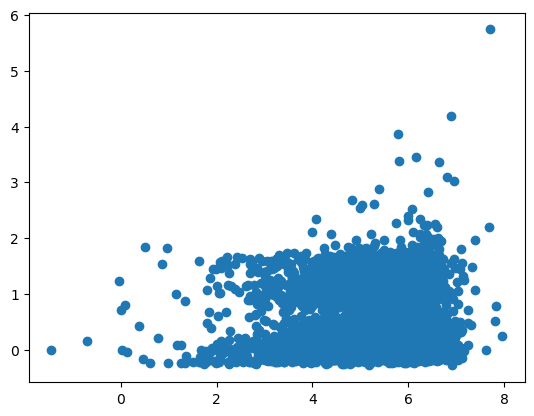

In [61]:
plt.scatter(bsc_in['Vmag'], bsc_in['B-V'])

Like arrays, you can assign values to particular elements of a DataFrame,
and you can do operations on big swaths of a DataFrame at once.

If we look at one of the values for in the 'Name' field, you'll note that there's some uncessary padding (extra spaces):

In [62]:
bsc_in.loc[2, 'Name']

'33    Psc'

Here we can use the `.str` method of the `pandas Series` to treat each value in the 'Name' field as a string, and use `.replace` to switch out the sequences that match the regex pattern `' +'`. That plus sign tells the code to look for any sequence of more than one of the character it comes after, in this instance, a space. Of course, we use `regex=True` to tell `.replace` we are using a regex pattern otherwise it will look for the literal characters space then plus sign in the strings.

In [63]:
bsc_in['Name'] = bsc_in['Name'].str.replace('  +', ' ', regex=True)
bsc_in.loc[2, 'Name']

'33 Psc'

Unlike arrays, you can add new columns as you please. Vmag is logarithmic in base ~2.512, so 
if you wanted a linear version of it for some calculation, you could do this:

In [68]:
bsc_in['Vmag_exp'] = 2.512 ** bsc_in['Vmag']
bsc_in['Vmag_exp']

0       478.775099
1       328.188610
2        69.837795
3       159.995655
4       242.168151
           ...    
9105    839.737470
9106    280.620999
9107    172.230380
9108    316.317136
9109    208.984407
Name: Vmag_exp, Length: 9110, dtype: float64

We don't really want to keep that though, so let's take a look at how we can easily drop that column:

In [69]:
bsc_in = bsc_in.drop(columns='Vmag_exp')
bsc_in

,HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
0,1,NaN,3.0,46.0,NaN,00 05 09.9,+45 13 45,6.70,0.07,A1Vn,NaN
1,2,NaN,6.0,NaN,NaN,00 05 03.8,-00 30 11,6.29,1.10,gG9,NaN
2,3,33 Psc,28.0,NaN,Var?,00 05 20.1,-05 42 27,4.61,1.04,K0IIIbCN-0.5,*
3,4,86 Peg,87.0,NaN,NaN,00 05 42.0,+13 23 46,5.51,0.90,G5III,NaN
4,5,NaN,123.0,61.0,V640 Cas,00 06 16.0,+58 26 12,5.96,0.67,G5V,*
...,...,...,...,...,...,...,...,...,...,...,...
9105,9106,NaN,225233.0,NaN,NaN,00 04 30.7,-72 53 52,7.31,0.44,F2V,NaN
9106,9107,NaN,225239.0,NaN,NaN,00 04 53.8,+34 39 35,6.12,0.62,G2V,NaN
9107,9108,NaN,225253.0,NaN,NaN,00 04 41.3,-71 26 13,5.59,-0.12,B8IV-V,NaN
9108,9109,NaN,225276.0,42.0,NaN,00 04 56.0,+26 38 56,6.25,1.40,K4IIIb,NaN


You can also drop rows. There are a few entries in the BSC that don't have actual
coordinates. Let's clean them up quickly. Note that the '~' means 'not', so we're 
saying: "get rid of all the rows that don't have a real RAJ2000 value".

In [78]:
bsc_in = bsc_in.loc[~(bsc_in['RAJ2000'] == '')]

After you do this sort of thing, it's usually a good idea to copy the dataframe and reset the
index -- otherwise you can get confusing errors. (There are cases where this isn't
true, of course, but it's a good rule of thumb.) This is the easiest way to do it:

In [79]:
bsc_in = bsc_in.copy().reset_index(drop=True)

There's one more thing we should do before we move on. The BSC gives RA and DEC
in hours/minutes/seconds notation. This is all well and good, but can be hard for general-purpose
tools to work with, because they don't usually understand this notation. Hence this error:

In [80]:
bsc_in.loc[(bsc_in['RAJ2000'] < 20) & (bsc_in['DEJ2000'] > 0)]

TypeError: '<' not supported between instances of 'str' and 'int'

Fortunately, `astropy` _does_ understand this notation, and we can use it to convert these
from hours/minutes/seconds to decimal. The `Angle` object from `astropy.coordinates` is our helper here.
Note that you have to specify the units, or astropy will be unhappy.

In [82]:
from astropy.coordinates import Angle
ra0 = Angle(bsc_in.loc[0, 'RAJ2000'], unit='hour')
# astropy parses and prints it nicely:
ra0

<Angle 0.08608333 hourangle>

and then you can convert it from hour-minute-second to decimal degrees:

In [84]:
ra0_decimal = ra0.degree
ra0_decimal

1.2912499999999998

That's all well and good for a single value -- but you can even pass the entire
Series at once...

In [85]:
ra_angles = Angle(bsc_in['RAJ2000'], unit='hour')
ra_angles

<Angle [0.08608333, 0.08438889, 0.08891667, ..., 0.07813889, 0.08222222,
        0.08505556] hourangle>

And convert it all to decimal at once!

In [86]:
ra_decimal = ra_angles.degree
ra_decimal

array([1.29125   , 1.26583333, 1.33375   , ..., 1.17208333, 1.23333333,
       1.27583333])

Let's do the same thing with declination, which is in degree-minute-second
rather than hour-minute-second:

In [87]:
dec_angle = Angle(bsc_in['DEJ2000'], unit='deg')
dec_angle

<Angle [ 45.22916667,  -0.50305556,  -5.7075    , ..., -71.43694444,
         26.64888889,  61.31416667] deg>

In [88]:
dec_decimal = dec_angle.degree
dec_decimal

array([ 45.22916667,  -0.50305556,  -5.7075    , ..., -71.43694444,
        26.64888889,  61.31416667])

Now we can go ahead and replace the ra/dec strings in the dataframe
with our decimal numbers.

In [89]:
bsc_in['RAJ2000'] = ra_decimal
bsc_in['DEJ2000'] = dec_decimal

And you'll find that our earlier expression will work:

In [90]:
bsc_in.loc[(bsc_in['RAJ2000'] < 20) & (bsc_in['DEJ2000'] > 0)]

,HR,Name,HD,ADS,VarID,RAJ2000,DEJ2000,Vmag,B-V,SpType,NoteFlag
0,1,NaN,3.0,46.0,NaN,1.291250,45.229167,6.70,0.07,A1Vn,NaN
3,4,86 Peg,87.0,NaN,NaN,1.425000,13.396111,5.51,0.90,G5III,NaN
4,5,NaN,123.0,61.0,V640 Cas,1.566667,58.436667,5.96,0.67,G5V,*
6,7,10 Cas,144.0,NaN,NaN,1.610417,64.196111,5.59,-0.03,B9III,*
7,8,NaN,166.0,69.0,33,1.653333,29.021389,6.13,0.75,K0V,*
...,...,...,...,...,...,...,...,...,...,...,...
9075,9104,NaN,225216.0,NaN,NaN,1.175000,67.166667,5.67,1.07,K1III,NaN
9076,9105,NaN,225218.0,30.0,NaN,1.152917,42.092222,6.01,NaN,B9III,*
9078,9107,NaN,225239.0,NaN,NaN,1.224167,34.659722,6.12,0.62,G2V,NaN
9080,9109,NaN,225276.0,42.0,NaN,1.233333,26.648889,6.25,1.40,K4IIIb,NaN
